In [1]:
import pandas as pd
import numpy as np

In [5]:
path='/content/drive/MyDrive/Dataset/201701_Taiwan.csv'
df=pd.read_csv(path)
df

,Date,Time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon
0,1/1/2017,8:00:00,74DA388FF60A,31,33,22,22.75,78,25.072,121.657
1,1/1/2017,8:00:00,74DA3895DF64,59,76,40,21.25,92,22.963,120.325
2,1/1/2017,8:00:00,74DA388FF60A,31,33,22,22.75,78,25.072,121.657
3,1/1/2017,8:00:00,74DA3895DF64,59,76,40,21.25,92,22.963,120.325
4,1/1/2017,8:00:00,74DA388FF60A,31,33,22,22.75,78,25.072,121.657
...,...,...,...,...,...,...,...,...,...,...
1048570,1/7/2017,12:54:19,74DA3895DEF0,42,54,29,28.12,63,22.608,120.314
1048571,1/7/2017,12:54:19,74DA3895E110,73,85,50,26.25,79,22.996,120.176
1048572,1/7/2017,12:54:20,74DA38A8692C,19,22,13,16.25,40,34.986,127.839
1048573,1/7/2017,12:54:20,74DA3895C564,38,47,27,28.00,66,25.062,121.451


device_id
PM2.5,PM10,PM1 bụi mịn


Temperature	nhiệt độ

Humidity độ ẩm

lat vĩ độ

lon lớn

#==========================================================

Check du lieu co bi trung lap

In [6]:
dups = df.duplicated()

print(dups.any())
print('--------------------')
print(df[dups])
#Xoa du lieu bi trung lap
df1=df.drop_duplicates()
df1.shape

True
--------------------
            Date     Time     device_id  PM2.5  PM10  PM1  Temperature  \
2       1/1/2017  8:00:00  74DA388FF60A     31    33   22        22.75   
3       1/1/2017  8:00:00  74DA3895DF64     59    76   40        21.25   
4       1/1/2017  8:00:00  74DA388FF60A     31    33   22        22.75   
5       1/1/2017  8:00:00  74DA3895DF64     59    76   40        21.25   
7       1/1/2017  8:00:01  74DA3895C20A     39    46   28        23.62   
...          ...      ...           ...    ...   ...  ...          ...   
962515  1/7/2017  1:08:05  28C2DDDD4790     23     0    0        26.00   
981990  1/7/2017  3:41:49  74DA3895C41E     48    60   36        30.62   
982003  1/7/2017  3:41:53  74DA3895C2D4     79    93   51        23.50   
982014  1/7/2017  3:41:57  74DA3895C406     15    17   11        28.25   
992816  1/7/2017  5:07:43  28C2DDDD47A4     40     0    0        25.62   

        Humidity     lat      lon  
2             78  25.072  121.657  
3            

(1032443, 10)

In [8]:
#check miss data
missing = df1.isna().any(axis=1)
missing.sum()

0

#==========================================================

xóa các cột có một giá trị

In [9]:
df1.columns

Index(['Date', 'Time', 'device_id', 'PM2.5', 'PM10', 'PM1', 'Temperature',
       'Humidity', ' lat', ' lon'],
      dtype='object')

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032443 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Date         1032443 non-null  object 
 1   Time         1032443 non-null  object 
 2   device_id    1032443 non-null  object 
 3   PM2.5        1032443 non-null  int64  
 4   PM10         1032443 non-null  int64  
 5   PM1          1032443 non-null  int64  
 6   Temperature  1032443 non-null  float64
 7   Humidity     1032443 non-null  int64  
 8    lat         1032443 non-null  float64
 9    lon         1032443 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 86.6+ MB


In [11]:
counts = df.nunique()
to_del = [i for i,v in enumerate(counts) if v==1]
print(to_del)

df1.drop(to_del,axis=1)
df1.shape

[]


(1032443, 10)

In [12]:
df1.nunique()

Date               7
Time           86400
device_id       1199
PM2.5            518
PM10             588
PM1              304
Temperature      574
Humidity         137
 lat             751
 lon             693
dtype: int64

In [14]:
df2 = df1.values
for i in range(df2.shape[1]):
  num = len(np.unique(df2[: , i]))
  per = float(num)/df2.shape[0]*100
  print('%d, %d, %.1f%%'%(i,num,per))

0, 7, 0.0%
1, 86400, 8.4%
2, 1199, 0.1%
3, 518, 0.1%
4, 588, 0.1%
5, 304, 0.0%
6, 574, 0.1%
7, 137, 0.0%
8, 751, 0.1%
9, 693, 0.1%


In [15]:
for i in range(df2.shape[1]):
  num = len(np.unique(df2[:,i]))
  per = float(num)/df2.shape[0]*100
  if per<1:
   print('%d, %d, %.1f%%'%(i,num,per))

0, 7, 0.0%
2, 1199, 0.1%
3, 518, 0.1%
4, 588, 0.1%
5, 304, 0.0%
6, 574, 0.1%
7, 137, 0.0%
8, 751, 0.1%
9, 693, 0.1%


In [21]:
print(df2.shape)
counts = pd.DataFrame(df2).nunique()
to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100)<1]
print(df2.shape)

(1032443, 10)
(1032443, 10)


Loai bo cac cot phuong sai thap

In [22]:
from sklearn.feature_selection import VarianceThreshold
x=df2[: , 3:-1]
y=df2[: , -1]
print(x.shape,y.shape)
trans = VarianceThreshold()
x_sel=trans.fit_transform(x)
x_sel.shape

(1032443, 6) (1032443,)


(1032443, 6)

>Thresholds= 0.000000,Features=6
>Thresholds= 0.050000,Features=6
>Thresholds= 0.100000,Features=6
>Thresholds= 0.150000,Features=6
>Thresholds= 0.200000,Features=6
>Thresholds= 0.250000,Features=6
>Thresholds= 0.300000,Features=6
>Thresholds= 0.350000,Features=6
>Thresholds= 0.400000,Features=6
>Thresholds= 0.450000,Features=6
>Thresholds= 0.500000,Features=6


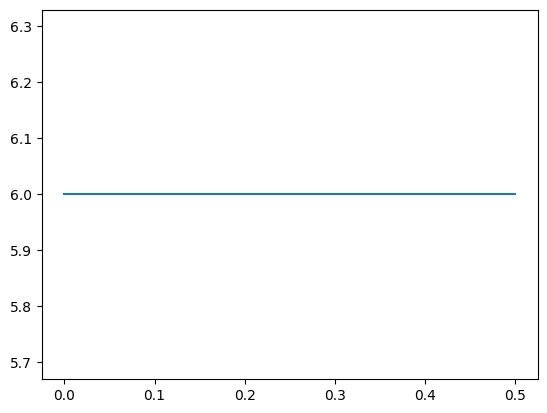

In [23]:
from numpy.core.multiarray import arange
from matplotlib import pyplot

thresholds = arange(0.0, 0.55, 0.05)
results=list()
for t in thresholds:
  trans = VarianceThreshold(threshold=t)
  x_sel=trans.fit_transform(x)
  n_features = x_sel.shape[1]
  print('>Thresholds= %2f,Features=%d' % (t,n_features))
  results.append(n_features)
pyplot.plot(thresholds,results)
pyplot.show();

#Thực hiện train dữ liệu

Đi dự đoán độ ẩm thông qua dữ liệu đã cho ở dataset bằng LogisticRegression

In [27]:
df1

,Date,Time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon
0,1/1/2017,8:00:00,74DA388FF60A,31,33,22,22.75,78,25.072,121.657
1,1/1/2017,8:00:00,74DA3895DF64,59,76,40,21.25,92,22.963,120.325
6,1/1/2017,8:00:01,74DA3895C20A,39,46,28,23.62,77,24.167,120.692
9,1/1/2017,8:00:01,74DA3895E03E,70,87,52,23.50,85,22.853,120.546
12,1/1/2017,8:00:02,74DA388FF506,16,0,0,23.50,92,25.160,121.420
...,...,...,...,...,...,...,...,...,...,...
1048570,1/7/2017,12:54:19,74DA3895DEF0,42,54,29,28.12,63,22.608,120.314
1048571,1/7/2017,12:54:19,74DA3895E110,73,85,50,26.25,79,22.996,120.176
1048572,1/7/2017,12:54:20,74DA38A8692C,19,22,13,16.25,40,34.986,127.839
1048573,1/7/2017,12:54:20,74DA3895C564,38,47,27,28.00,66,25.062,121.451


In [28]:
#ở hạng 1 nếu độ ẩm bằng hoặc trên 85
#ở hạng 2 nếu độ ẩm bằng hoặc trên 70
#ở hạng 3 nếu độ ẩm bằng hoặc trên 50
#ở hạng 4 nếu độ ẩm dưới 50
df1['Humidity_n'] = np.where(df1['Humidity'] >= 85,1, np.where(df1['Humidity'] >= 70,2, np.where(df1['Humidity'] >= 50, 3 ,4 )))

<ipython-input-28-504f43de5a9f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Humidity_n'] = np.where(df1['Humidity'] >= 85,1, np.where(df1['Humidity'] >= 70,2, np.where(df1['Humidity'] >= 50, 3 ,4 )))


In [29]:
df1

,Date,Time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon,Humidity_n
0,1/1/2017,8:00:00,74DA388FF60A,31,33,22,22.75,78,25.072,121.657,2
1,1/1/2017,8:00:00,74DA3895DF64,59,76,40,21.25,92,22.963,120.325,1
6,1/1/2017,8:00:01,74DA3895C20A,39,46,28,23.62,77,24.167,120.692,2
9,1/1/2017,8:00:01,74DA3895E03E,70,87,52,23.50,85,22.853,120.546,1
12,1/1/2017,8:00:02,74DA388FF506,16,0,0,23.50,92,25.160,121.420,1
...,...,...,...,...,...,...,...,...,...,...,...
1048570,1/7/2017,12:54:19,74DA3895DEF0,42,54,29,28.12,63,22.608,120.314,3
1048571,1/7/2017,12:54:19,74DA3895E110,73,85,50,26.25,79,22.996,120.176,2
1048572,1/7/2017,12:54:20,74DA38A8692C,19,22,13,16.25,40,34.986,127.839,4
1048573,1/7/2017,12:54:20,74DA3895C564,38,47,27,28.00,66,25.062,121.451,3


=========================================================

In [ ]:
#cắt dữ liệu để train khoảng 10000 dòng
data1 = df1.values
x = data1[:10000 , 3:-1]
y = data1[:10000 , -1]

In [ ]:
from numpy import mean
from numpy import std
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression


X=x.astype('float')
y=LabelEncoder().fit_transform(y.astype('str'))

model = LogisticRegression(solver='liblinear')

cv= RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

scores = cross_val_score(model,X,y,scoring='accuracy',cv=cv,n_jobs=-1)
print('Accuracy: %.3f (%.3f)'%(mean(scores) , std(scores)))


Accuracy: 0.826 (0.007)


=============================================================

In [ ]:
from sklearn import pipeline
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,QuantileTransformer,KBinsDiscretizer
from sklearn.decomposition import PCA, TruncatedSVD


transforms = list()
transforms.append(('mms',MinMaxScaler()))
transforms.append(('ss',StandardScaler()))
transforms.append(('rs',RobustScaler()))
transforms.append(('qt',QuantileTransformer(n_quantiles=100,output_distribution='normal')))
transforms.append(('kbd',KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform')))
transforms.append(('pca',PCA(n_components=7)))
transforms.append(('svd',TruncatedSVD(n_components=7)))

fu=FeatureUnion(transforms)
model = LogisticRegression(solver='liblinear')
steps=list()
steps.append(('fu',fu))
steps.append(('m',model))
pipeline = Pipeline(steps=steps)

cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

scores = cross_val_score(pipeline,X,y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)'%(mean(scores) , std(scores)))




Accuracy: 0.976 (0.004)


===========================================================

In [ ]:
from sklearn.feature_selection import RFE


#cắt dữ liệu để train khoảng 1000 dòng
data1 = df1.values
x1 = data1[:1000 , 3:-1]
y1 = data1[:1000 , -1]

X1=x1.astype('float')
y1=LabelEncoder().fit_transform(y1.astype('str'))

transforms = list()
transforms.append(('mms',MinMaxScaler()))
transforms.append(('ss',StandardScaler()))
transforms.append(('rs',RobustScaler()))
transforms.append(('qt',QuantileTransformer(n_quantiles=100,output_distribution='normal')))
transforms.append(('kbd',KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform')))
transforms.append(('pca',PCA(n_components=7)))
transforms.append(('svd',TruncatedSVD(n_components=7)))

fu=FeatureUnion(transforms)
rfe=RFE(estimator=LogisticRegression(solver='liblinear'),n_features_to_select=15)
model = LogisticRegression(solver='liblinear')
steps=list()
steps.append(('fu',fu))
steps.append(('rfe',rfe))
steps.append(('m',model))
pipeline = Pipeline(steps=steps)

cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

scores = cross_val_score(pipeline,X1,y1, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)'%(mean(scores) , std(scores)))

Accuracy: 0.952 (0.016)


======================================================

#Lấy các cột PM2.5	,PM10,	PM1	,Temperature	,Humidity	,lat để dự đoán cột lon

In [ ]:
x = df1[: , 3:-1]
y=df1[: , -1]

In [ ]:
X = x.astype('float')
X.dtype

dtype('float64')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1048575, 6])) that is different to the input size (torch.Size([1048575, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/1000], Loss: 711.1989
Epoch [20/1000], Loss: 694.5463
Epoch [30/1000], Loss: 689.0771
Epoch [40/1000], Loss: 687.6523
Epoch [50/1000], Loss: 686.1348
Epoch [60/1000], Loss: 684.3803
Epoch [70/1000], Loss: 682.8430
Epoch [80/1000], Loss: 681.4717
Epoch [90/1000], Loss: 680.1901
Epoch [100/1000], Loss: 679.0112
Epoch [110/1000], Loss: 677.9349
Epoch [120/1000], Loss: 676.9487
Epoch [130/1000], Loss: 676.0433
Epoch [140/1000], Loss: 675.2084
Epoch [150/1000], Loss: 674.4338
Epoch [160/1000], Loss: 673.7099
Epoch [170/1000], Loss: 673.0285
Epoch [180/1000], Loss: 672.3824
Epoch [190/1000], Loss: 671.7657
Epoch [200/1000], Loss: 671.1737
Epoch [210/1000], Loss: 670.6025
Epoch [220/1000], Loss: 670.0494
Epoch [230/1000], Loss: 669.5123
Epoch [240/1000], Loss: 668.9896
Epoch [250/1000], Loss: 668.4803
Epoch [260/1000], Loss: 667.9839
Epoch [270/1000], Loss: 667.4997
Epoch [280/1000], Loss: 667.0275
Epoch [290/1000], Loss: 666.5670
Epoch [300/1000], Loss: 666.1183
Epoch [310/1000], L

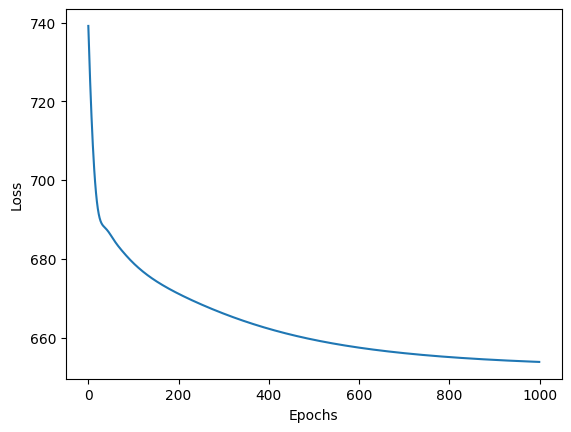

In [ ]:
#Linear regression
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import matplotlib.pyplot as plt

x_train = torch.tensor(X,dtype=torch.float32)
y_train = torch.tensor(X,dtype=torch.float32)

n_samples, n_features = x_train.shape[0], x_train.shape[1]
input_size = n_features
output_size = 1

class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

model = LinearRegression(input_size, output_size)
mse = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

loss_list = []
epochs = 1000

for epoch in range(epochs):
    # Forward pass
    outputs = model(x_train)
    loss = mse(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_list.append(loss.item())

    if (epoch + 1) % 10== 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

plt.plot(range(epochs), loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
